#  <font color=red>PROJECT 3 - KAGGLE COMPETITION - Richard Giegerich</font>
## Data : Ames, IA housing data
## Part 1 - Regression Challenge
## Part 2 - Classification Challenge

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

 # <font color=red>PART 1 : REGRESSION CHALLENGE</font>

### Load data :

In [2]:
ames = pd.read_csv('train.csv')

### Examine dataset for basic EDA :

In [3]:
ames.shape

(2051, 81)

In [4]:
ames.head()

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,528120170,20,RL,77.0,10872,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2009,WD,Normal,300000
1,535179060,20,RL,80.0,11900,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,166000
2,528138030,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
3,526355170,20,RL,95.0,13651,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,244000
4,909452050,80,RL,NaN,13607,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,1500,4,2009,WD,Normal,208000


In [5]:
ames.columns

Index([u'PID', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'X1stFlrSF',
       u'X2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinis

In [6]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
PID              2051 non-null int64
MSSubClass       2051 non-null int64
MSZoning         2051 non-null object
LotFrontage      1705 non-null float64
LotArea          2051 non-null int64
Street           2051 non-null object
Alley            133 non-null object
LotShape         2051 non-null object
LandContour      2051 non-null object
Utilities        2051 non-null object
LotConfig        2051 non-null object
LandSlope        2051 non-null object
Neighborhood     2051 non-null object
Condition1       2051 non-null object
Condition2       2051 non-null object
BldgType         2051 non-null object
HouseStyle       2051 non-null object
OverallQual      2051 non-null int64
OverallCond      2051 non-null int64
YearBuilt        2051 non-null int64
YearRemodAdd     2051 non-null int64
RoofStyle        2051 non-null object
RoofMatl         2051 non-null object
Exterior1st      2051 non-

### Check feature variables for null values :

> ###  Observation: There are too many features for one view, so I need to slice the data. Nulls will be addressed after I decide which features I will use and will be handled on a case-by-case basis.

In [7]:
ames.isnull().sum()[0:45]

PID                0
MSSubClass         0
MSZoning           0
LotFrontage      346
LotArea            0
Street             0
Alley           1918
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType        19
MasVnrArea        19
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          59
BsmtCond          59
BsmtExposure      60
BsmtFinType1      59
BsmtFinSF1         1
BsmtFinType2      60
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
X1stFlrSF          0
X2ndFlrSF          0
dtype: int64

In [8]:
ames.isnull().sum()[45:]

LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu      1001
GarageType        117
GarageYrBlt       119
GarageFinish      119
GarageCars          1
GarageArea          1
GarageQual        119
GarageCond        119
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
X3SsnPorch          0
ScreenPorch         0
PoolArea            0
PoolQC           2042
Fence            1666
MiscFeature      1976
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

### Look at correlation to target variable "SalePrice" :

> ### Observation: Correlation will only work for numerical columns. I can at least start looking at which of these might be good feature variables. Categorical variables will be addressed later.

In [9]:
ames.corr()['SalePrice']

PID             -0.240636
MSSubClass      -0.106015
LotFrontage      0.369746
LotArea          0.252609
OverallQual      0.799037
OverallCond     -0.098810
YearBuilt        0.550969
YearRemodAdd     0.528435
MasVnrArea       0.528531
BsmtFinSF1       0.437822
BsmtFinSF2       0.026683
BsmtUnfSF        0.195365
TotalBsmtSF      0.648971
X1stFlrSF        0.628193
X2ndFlrSF        0.276934
LowQualFinSF    -0.031294
GrLivArea        0.715202
BsmtFullBath     0.275757
BsmtHalfBath    -0.032673
FullBath         0.546498
HalfBath         0.291860
BedroomAbvGr     0.149185
KitchenAbvGr    -0.122658
TotRmsAbvGrd     0.505865
Fireplaces       0.478119
GarageYrBlt      0.518012
GarageCars       0.650908
GarageArea       0.645322
WoodDeckSF       0.328538
OpenPorchSF      0.321918
EnclosedPorch   -0.122217
X3SsnPorch       0.021667
ScreenPorch      0.119902
PoolArea         0.092817
MiscVal         -0.016396
MoSold           0.004864
YrSold          -0.041587
SalePrice        1.000000
Name: SalePr

> ### Observation: There are definitely some variables worth considering :
-  OverallQual
-  YearBuilt or YearRemodAdd
-  GrLivArea
-  FullBath

### Let's look at variables more closely :

In [11]:
ames['MSZoning'].value_counts(dropna=False)

RL         1593
RM          322
FV           92
C (all)      23
RH           17
A (agr)       2
I (all)       2
Name: MSZoning, dtype: int64

In [12]:
ames['Utilities'].value_counts(dropna=False)

AllPub    2048
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64

In [13]:
ames['LotConfig'].value_counts(dropna=False)

Inside     1487
Corner      365
CulDSac     125
FR2          64
FR3          10
Name: LotConfig, dtype: int64

> ### Observation: I can't look at corr() of categorical variables, so going forward I will use Barplots and/or Pairplots to see the relationships to SalePrice.

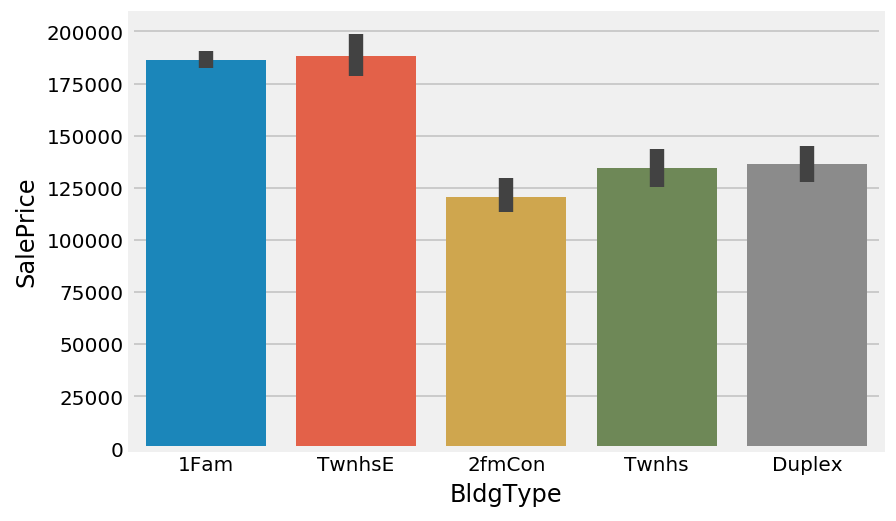

In [14]:
sns.barplot(x='BldgType', y='SalePrice', data=ames)

In [15]:
ames['BldgType'].value_counts(dropna=False)

1Fam      1698
TwnhsE     161
Twnhs       71
Duplex      71
2fmCon      50
Name: BldgType, dtype: int64

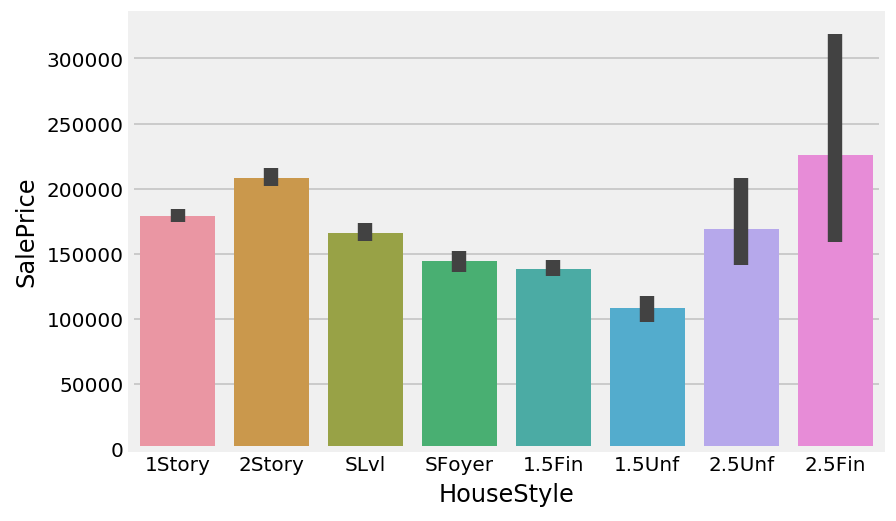

In [16]:
sns.barplot(x='HouseStyle', y='SalePrice', data=ames)

In [17]:
ames['HouseStyle'].value_counts(dropna=False)

1Story    1036
2Story     610
1.5Fin     215
SLvl        95
SFoyer      53
2.5Unf      18
1.5Unf      17
2.5Fin       7
Name: HouseStyle, dtype: int64

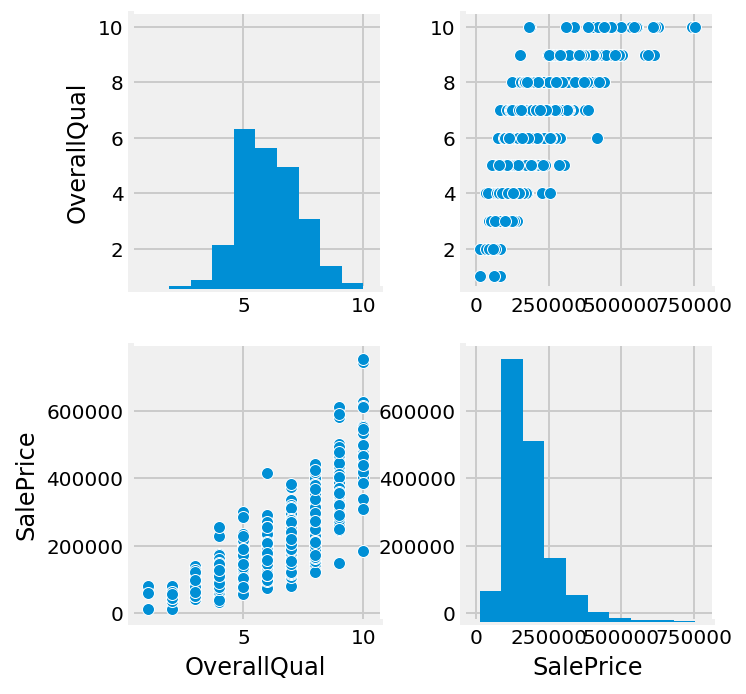

In [18]:
sns.pairplot(ames[['OverallQual','SalePrice']])

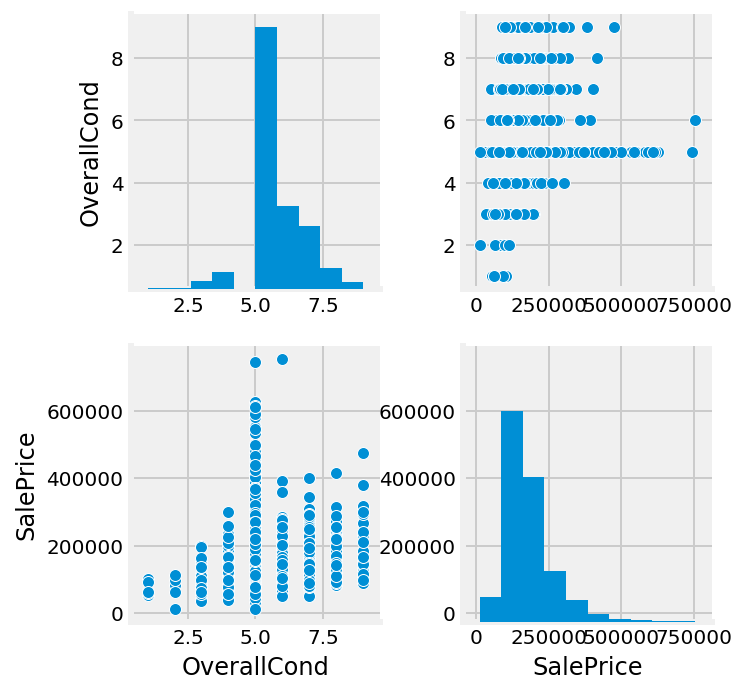

In [19]:
sns.pairplot(ames[['OverallCond','SalePrice']])

> ### Observation:  As seen above, I noticed that OverallCond is not as good of a predictor to SalePrice as OverallQual is.  Also, I see that a disproportionately large number of houses received an OverallCond score of 5, which is the midpoint of that scale.  So there might have been some confusion in the collection of that data. So I will use OverallQual and not OverallCond.

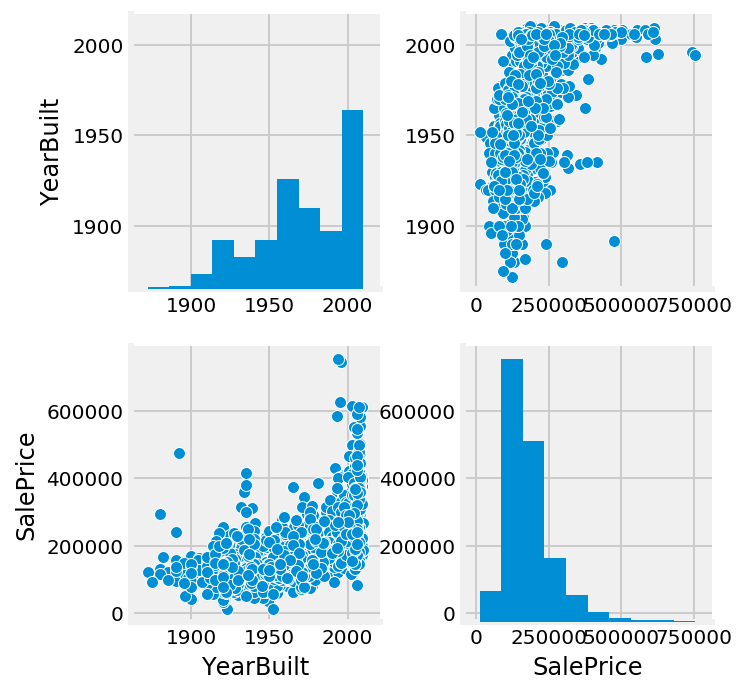

In [21]:
sns.pairplot(ames[['YearBuilt','SalePrice']])

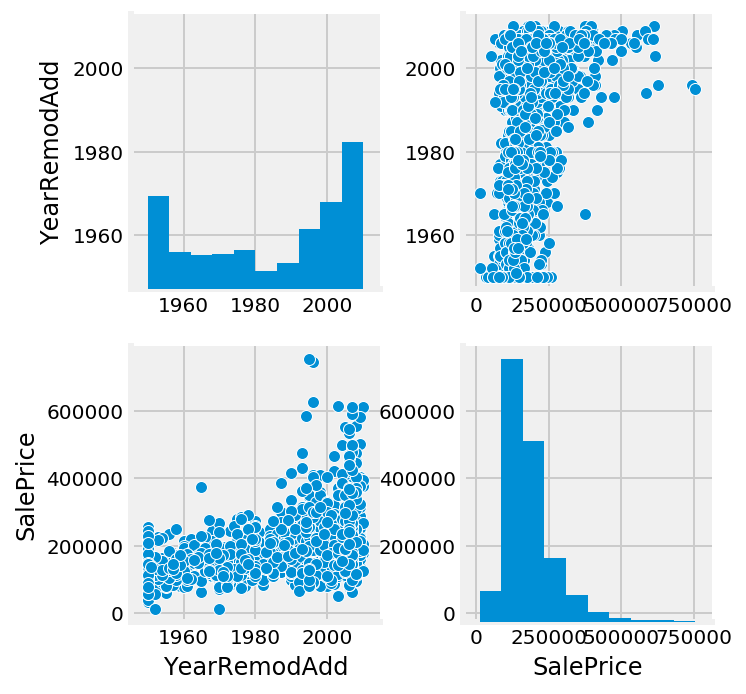

In [22]:
sns.pairplot(ames[['YearRemodAdd','SalePrice']])

> ### Observation: As seen above, YearBuilt versus YearRemodAdd seems redundant and only one should be used.  YearRemodAdd seems more predictive to SalePrice, there seem to be less outliers, and YearRemodAdd seems more homoscedastic than YearBuilt does.  Also, it seems more intuitive to consider the last date the house was remodeled, if it was remodeled, and not just the year it was built.  So I will use YearRemodAdd and not YearBuilt.

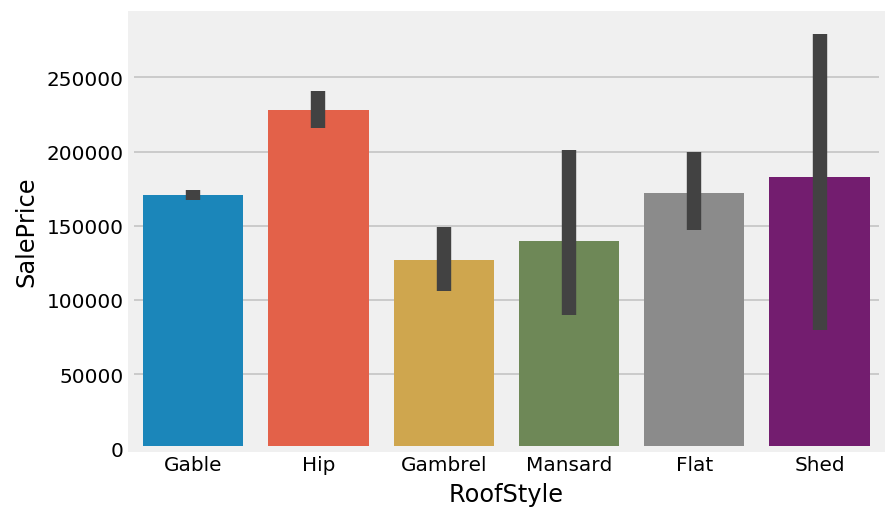

In [24]:
sns.barplot(x='RoofStyle', y='SalePrice', data=ames)

In [25]:
ames['RoofStyle'].value_counts()

Gable      1616
Hip         396
Flat         16
Gambrel      13
Mansard       7
Shed          3
Name: RoofStyle, dtype: int64

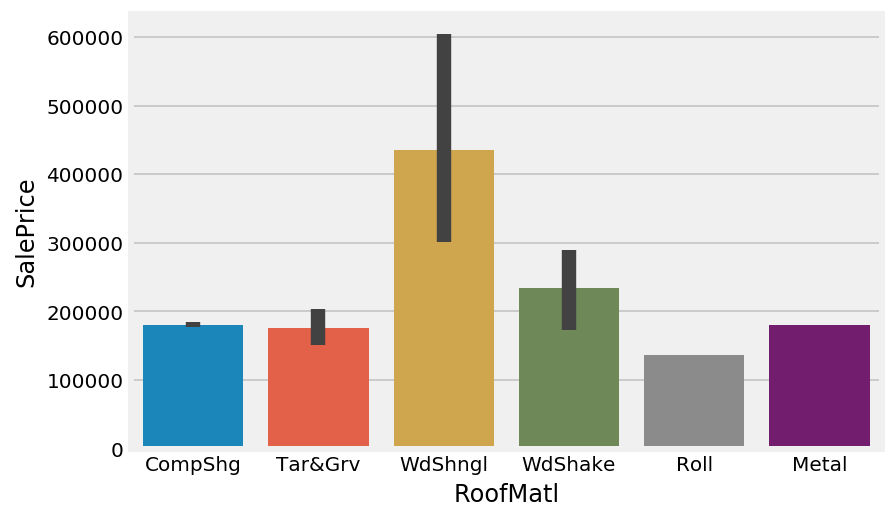

In [26]:
sns.barplot(x='RoofMatl', y='SalePrice', data=ames)

In [27]:
ames['RoofMatl'].value_counts()

CompShg    2022
Tar&Grv      18
WdShngl       5
WdShake       4
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

> ### Observation:  Data seems too clustered for both RoofStyle and RoofMatl.  I will skip these features.

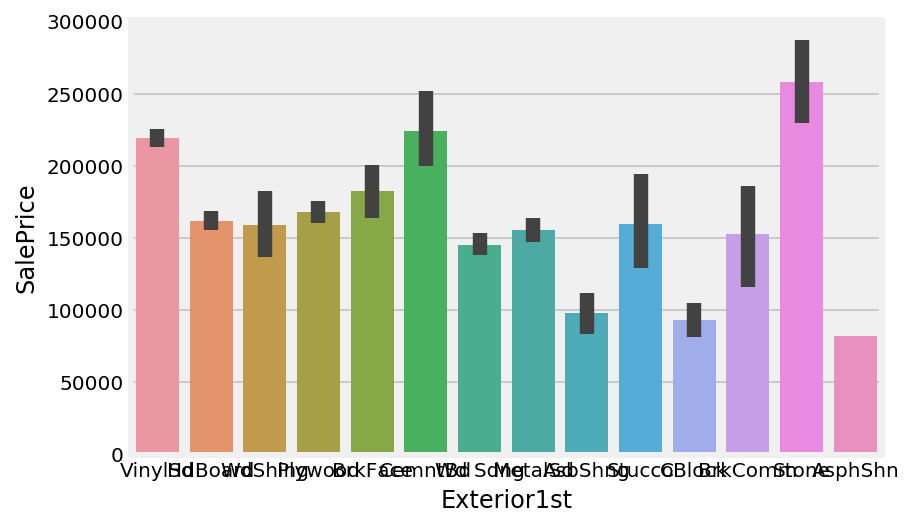

In [29]:
sns.barplot(x='Exterior1st', y='SalePrice', data=ames)

In [30]:
ames['Exterior1st'].value_counts()

VinylSd    720
HdBoard    324
MetalSd    307
Wd Sdng    293
Plywood    146
CemntBd     89
BrkFace     69
WdShing     37
AsbShng     31
Stucco      25
BrkComm      5
Stone        2
CBlock       2
AsphShn      1
Name: Exterior1st, dtype: int64

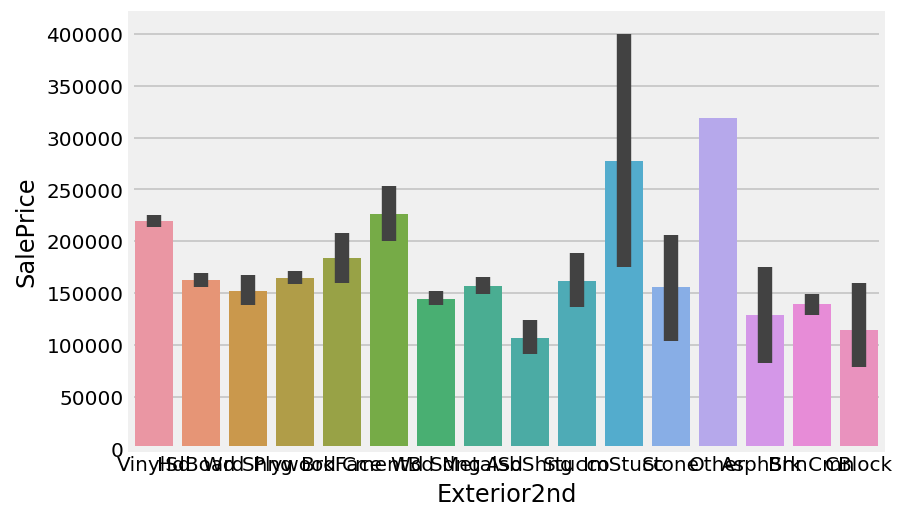

In [31]:
sns.barplot(x='Exterior2nd', y='SalePrice', data=ames)

In [32]:
ames['Exterior2nd'].value_counts()

VinylSd    710
MetalSd    305
HdBoard    298
Wd Sdng    282
Plywood    182
CmentBd     89
Wd Shng     56
BrkFace     36
Stucco      30
AsbShng     28
Brk Cmn     15
ImStucc      9
Stone        5
CBlock       3
AsphShn      2
Other        1
Name: Exterior2nd, dtype: int64

> ### Observation: Exterior 2 seems redundant and a bit excess data, so I will use Exterior 1 only.

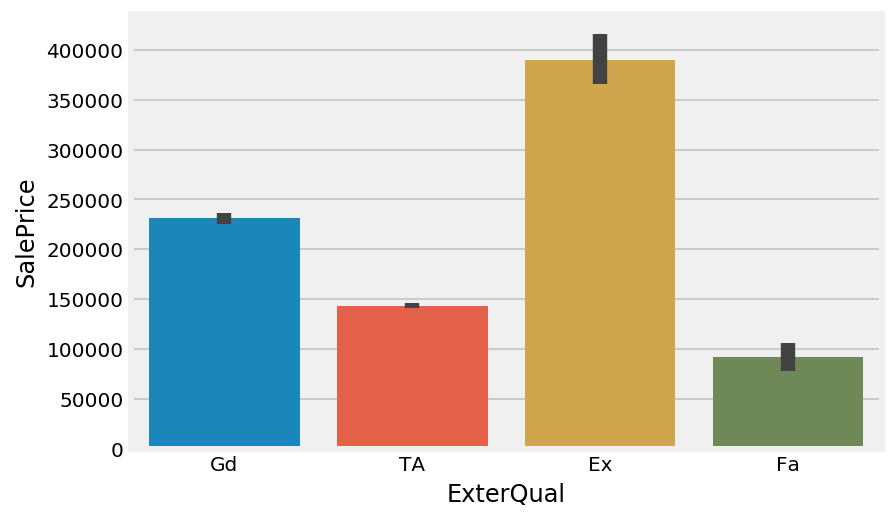

In [34]:
sns.barplot(x='ExterQual', y='SalePrice', data=ames)

In [35]:
ames['ExterQual'].value_counts()

TA    1251
Gd     696
Ex      76
Fa      28
Name: ExterQual, dtype: int64

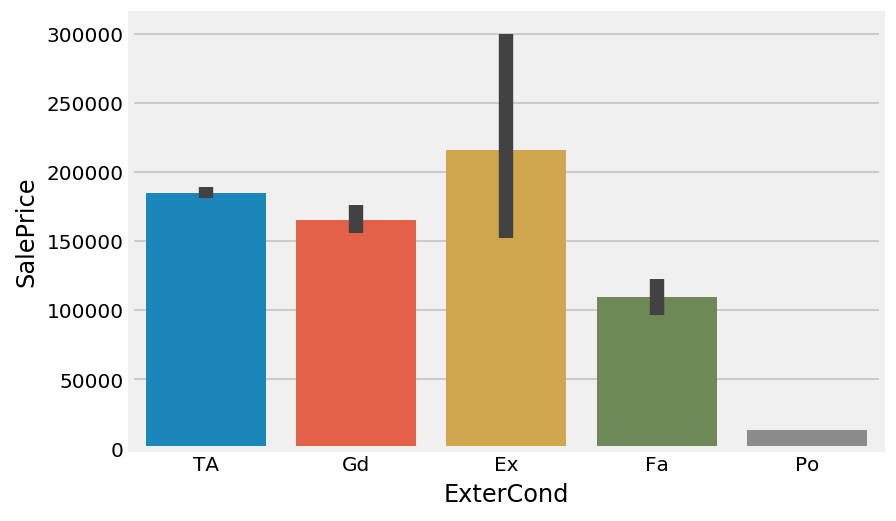

In [36]:
sns.barplot(x='ExterCond', y='SalePrice', data=ames)

In [37]:
ames['ExterCond'].value_counts()

TA    1796
Gd     198
Fa      48
Ex       8
Po       1
Name: ExterCond, dtype: int64

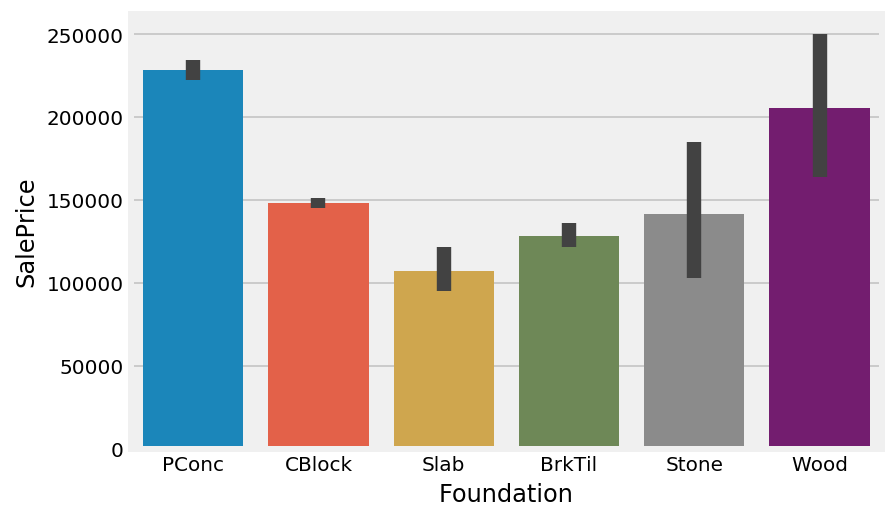

In [38]:
sns.barplot(x='Foundation', y='SalePrice', data=ames)

In [39]:
ames['Foundation'].value_counts()

PConc     918
CBlock    872
BrkTil    211
Slab       38
Stone       9
Wood        3
Name: Foundation, dtype: int64

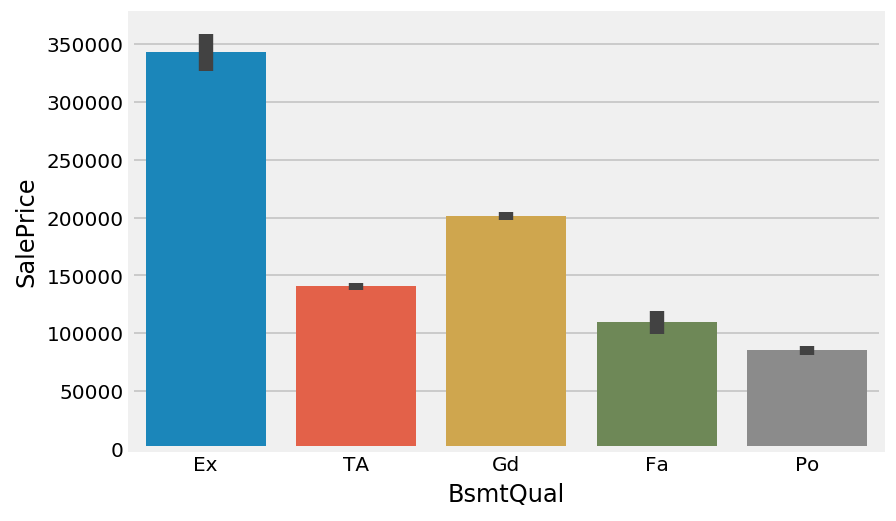

In [40]:
sns.barplot(x='BsmtQual', y='SalePrice', data=ames)

In [41]:
ames['BsmtQual'].value_counts(dropna=False)

TA     884
Gd     863
Ex     179
Fa      64
NaN     59
Po       2
Name: BsmtQual, dtype: int64

In [42]:
ames['BsmtQual'].replace(np.nan, 'None', inplace=True)

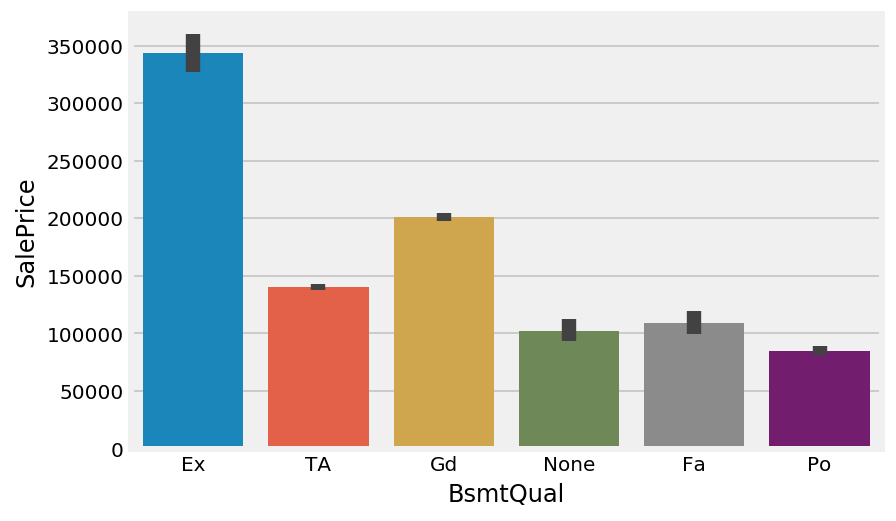

In [43]:
sns.barplot(x='BsmtQual', y='SalePrice', data=ames)

In [44]:
ames['BsmtQual'].value_counts(dropna=False)

TA      884
Gd      863
Ex      179
Fa       64
None     59
Po        2
Name: BsmtQual, dtype: int64

> ### Observation:  It appears above that the NaN for BsmtQual represents having no basement, so I replaced NaN with None for those cells. I will include the presence (BsmtQual) of a basement in my feature set, but not the extra basement detail features.

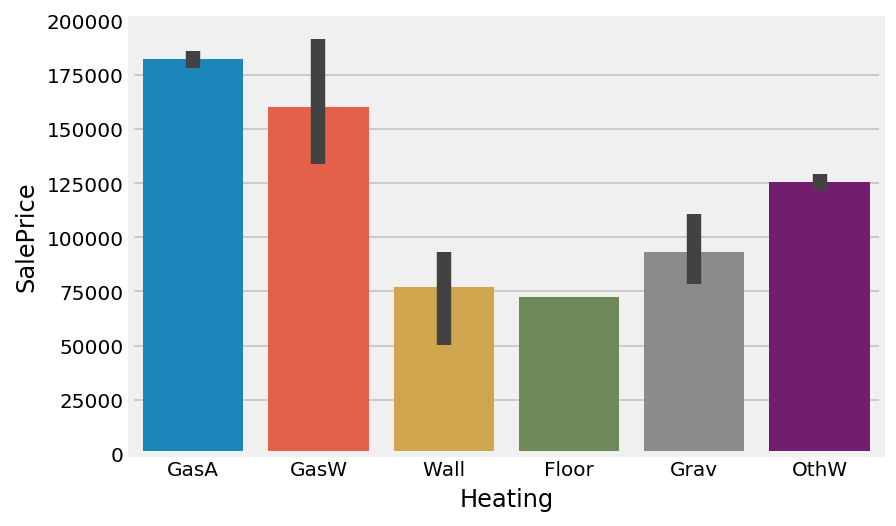

In [46]:
sns.barplot(x='Heating', y='SalePrice', data=ames)

In [47]:
ames['Heating'].value_counts()

GasA     2017
GasW       21
Wall        6
Grav        4
OthW        2
Floor       1
Name: Heating, dtype: int64

> ### Observation:  Not enough spread. Omit Heating features as potential features.

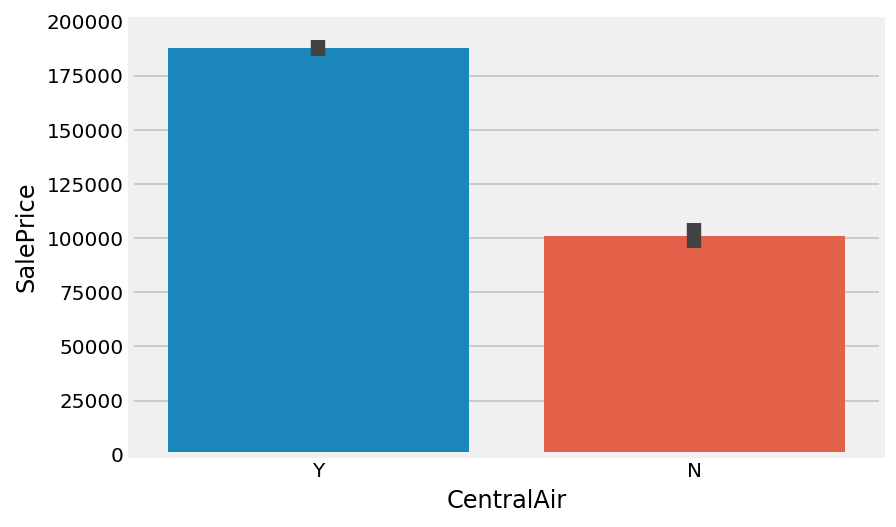

In [49]:
sns.barplot(x='CentralAir', y='SalePrice', data=ames)

In [50]:
ames['CentralAir'].value_counts()

Y    1902
N     149
Name: CentralAir, dtype: int64

> ### Observation:  The presence of Central Air greatly affects price of house, so I will include it even though there aren't many home sales without it.

In [52]:
ames['Electrical'].value_counts()

SBrkr    1877
FuseA     132
FuseF      36
FuseP       5
Name: Electrical, dtype: int64

> ### Observation: Electrical is predominantly SBrkr, so I will not use it.

### Look at GrLivArea where it was advised that there were some outliers that can be removed:

> ### Observation: I will NOT use any of the features that breaks down square feet by floor. Instead I will use GrLivArea which represents all living areas above ground (not basement).  This is a key feature of the sale price of a home.

In [55]:
ames['GrLivArea'].sort_values()

1118     407
705      438
171      480
1036     492
406      540
790      599
694      605
1210     612
1232     630
622      630
1556     630
686      630
1920     641
981      660
1820     666
573      670
930      672
1228     672
1371     672
276      672
869      691
1879     698
1690     704
1798     708
1959     713
1650     715
265      720
777      720
1777     729
959      729
        ... 
1852    2822
1882    2828
1531    2840
1670    2855
94      2872
660     2872
1478    2898
880     2944
2015    2945
884     3078
1553    3082
633     3086
1615    3086
260     3112
898     3194
707     3228
240     3238
1860    3390
1662    3395
1819    3447
1643    3493
638     3500
610     3608
444     3627
1433    3672
1664    3820
506     4316
228     4476
300     4676
1845    5095
Name: GrLivArea, Length: 2051, dtype: int64

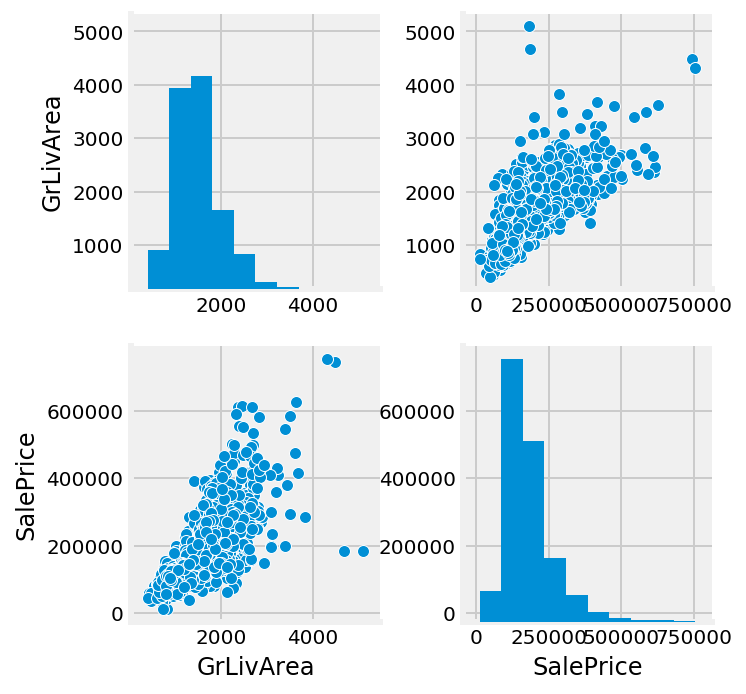

In [56]:
sns.pairplot(ames[['GrLivArea','SalePrice']])

### Remove the 4 outliers in GrLivArea that have values above 4000:

In [58]:
ames.drop(ames[ames['GrLivArea']>4000].index, inplace=True)

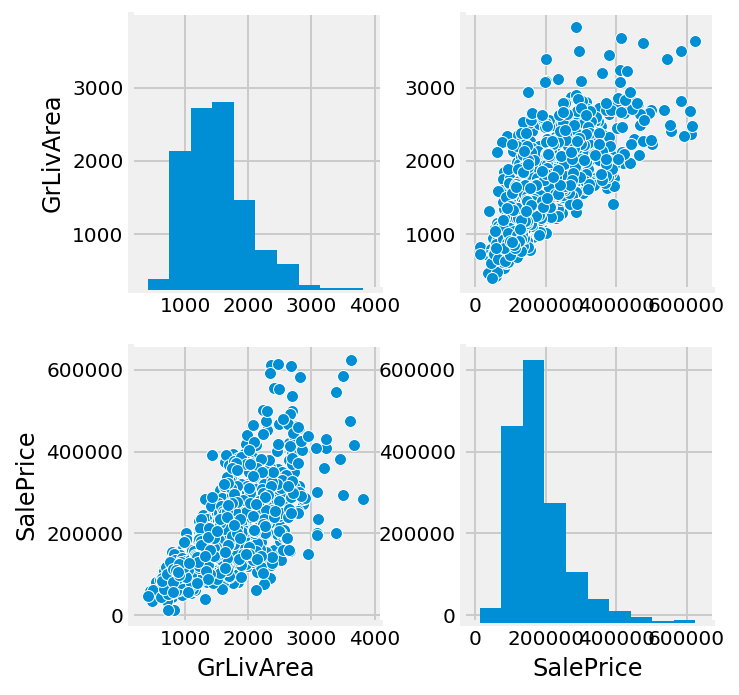

In [59]:
sns.pairplot(ames[['GrLivArea','SalePrice']])

> ### Observation: Outliers removed and Pairplot looks better.

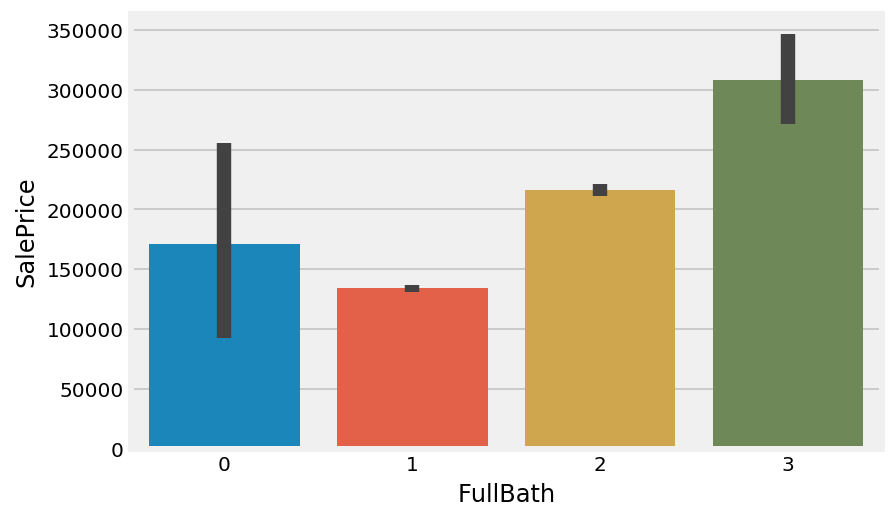

In [61]:
sns.barplot(x='FullBath', y='SalePrice', data=ames)

In [62]:
ames['FullBath'].value_counts()

2    1077
1     921
3      42
0       7
Name: FullBath, dtype: int64

In [63]:
ames[ames['FullBath']==0].index

Int64Index([171, 377, 470, 1267, 1554, 1644, 1728], dtype='int64')

> ### Observation:  There are 7 homes in the training set that were sold with 0 bathrooms. This is highly unlikely, so let's see if these 7 homes have bathrooms in the basement.   

### Check if 0 FullBath houses have 1 or 2 BsmtFullBath:

In [65]:
zero_fullbath = ames[(ames['FullBath']==0) & ((ames['BsmtFullBath']==1) | (ames['BsmtFullBath']==2))].index

In [66]:
zero_fullbath

Int64Index([171, 377, 470, 1267, 1554, 1644, 1728], dtype='int64')

> ### Observation: As expected, those 7 homes were NOT sold without a bathroom.  They just happen to have either 1 or 2 basement bathrooms.  I will extract a new feature called TotalBath by adding the FullBath with the BsmtFullBath.  This column should be a  good feature to include in my model.  First I need to impute 0 for two NaN values in BsmtFullBath.

In [68]:
ames['BsmtFullBath'].value_counts(dropna=False)

 0.0    1211
 1.0     810
 2.0      24
NaN        2
Name: BsmtFullBath, dtype: int64

### Impute 0 for the 2 homes with NaN for BsmtFullBath :

In [69]:
ames['BsmtFullBath'].fillna(0,inplace=True)

In [70]:
ames['BsmtFullBath'].value_counts(dropna=False)

0.0    1213
1.0     810
2.0      24
Name: BsmtFullBath, dtype: int64

### Add FullBath to BsmtFullBath :

In [72]:
ames['TotalBath'] = ames['FullBath'] + ames['BsmtFullBath']

In [73]:
ames['TotalBath'].value_counts()

2.0    1033
1.0     540
3.0     443
4.0      31
Name: TotalBath, dtype: int64

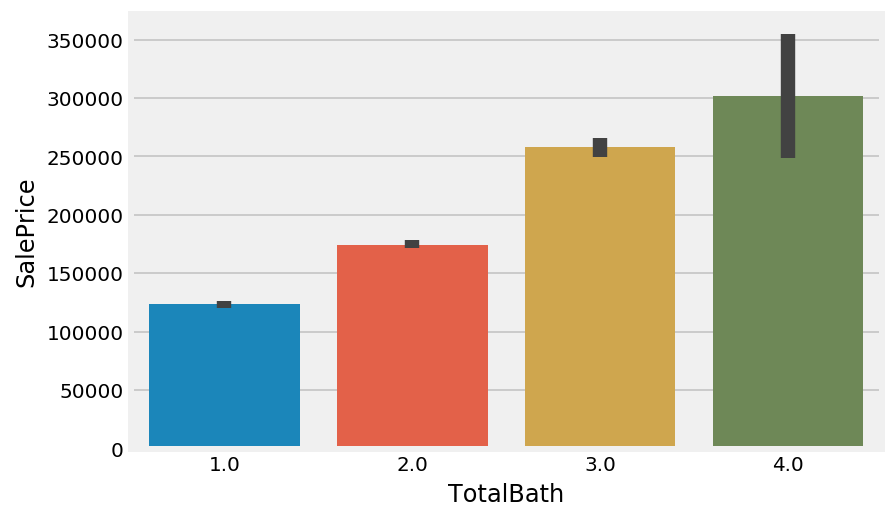

In [74]:
sns.barplot(x='TotalBath', y='SalePrice', data=ames)

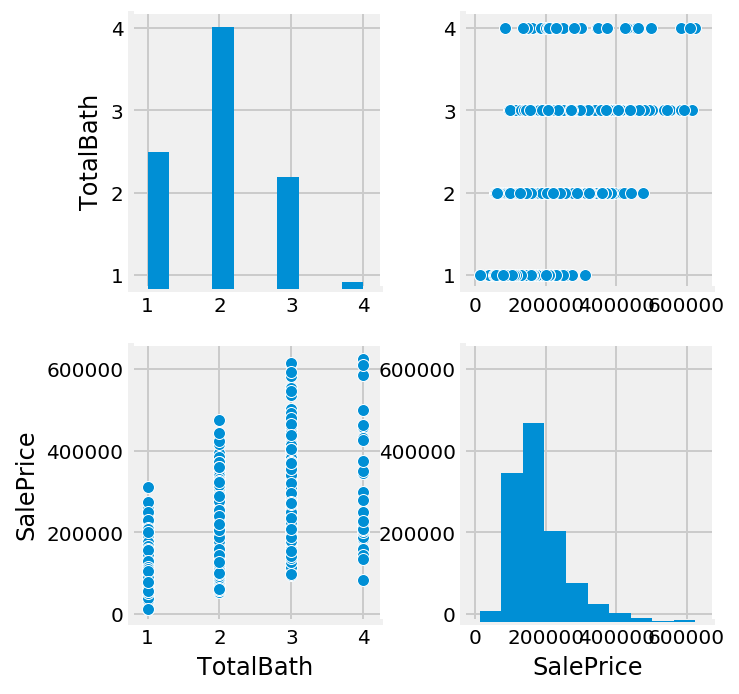

In [75]:
sns.pairplot(ames[['TotalBath','SalePrice']])

> ### Observation: As shown above, there is excellent correlation between TotalBath and SalePrice.

In [77]:
ames['BedroomAbvGr'].value_counts()

3    1127
2     515
4     286
1      72
5      33
6       8
0       5
8       1
Name: BedroomAbvGr, dtype: int64

In [78]:
ames['Fireplaces'].value_counts(dropna=False)

0    1001
1     877
2     161
3       7
4       1
Name: Fireplaces, dtype: int64

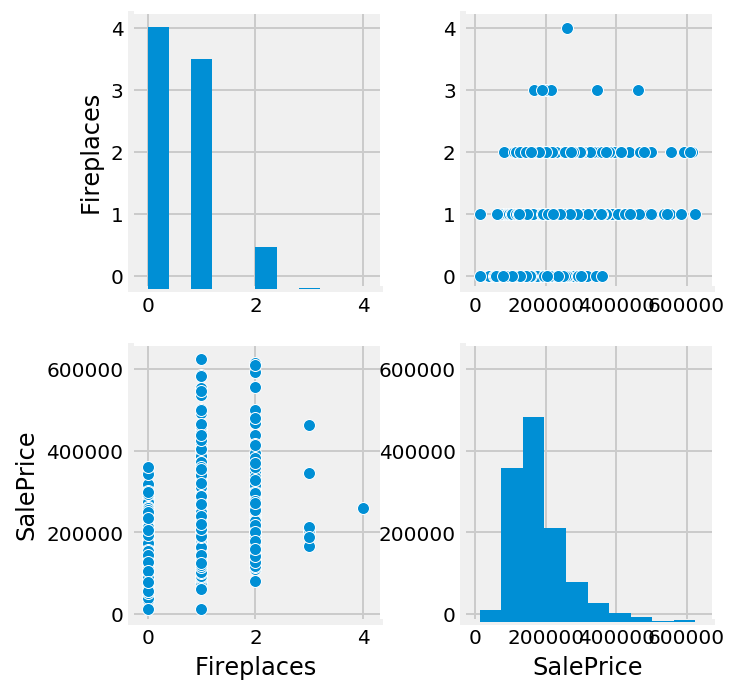

In [79]:
sns.pairplot(ames[['Fireplaces','SalePrice']])

> ### Observation: There are a few outliers of Fireplaces for quantity 3 and 4, so I'm deciding to just look at whether or not the house has a Fireplace at all.

### Extract a new feature called FireplacesAny.  These values will be 1 if there is ANY fireplace in the house, or 0 if there is none.

In [81]:
ames['FireplacesAny'] = [0 if x==0 else 1 for x in ames['Fireplaces']]

In [82]:
ames['FireplacesAny'].value_counts()

1    1046
0    1001
Name: FireplacesAny, dtype: int64

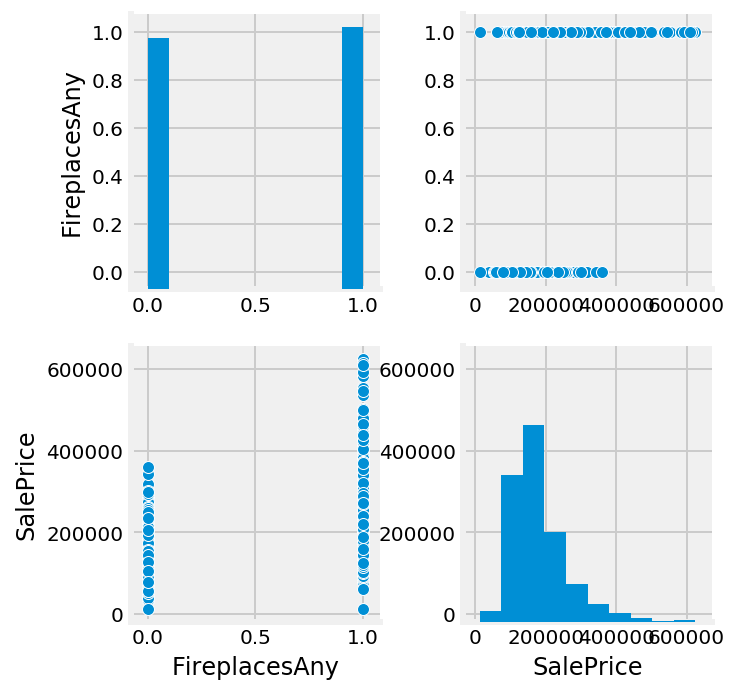

In [83]:
sns.pairplot(ames[['FireplacesAny','SalePrice']])

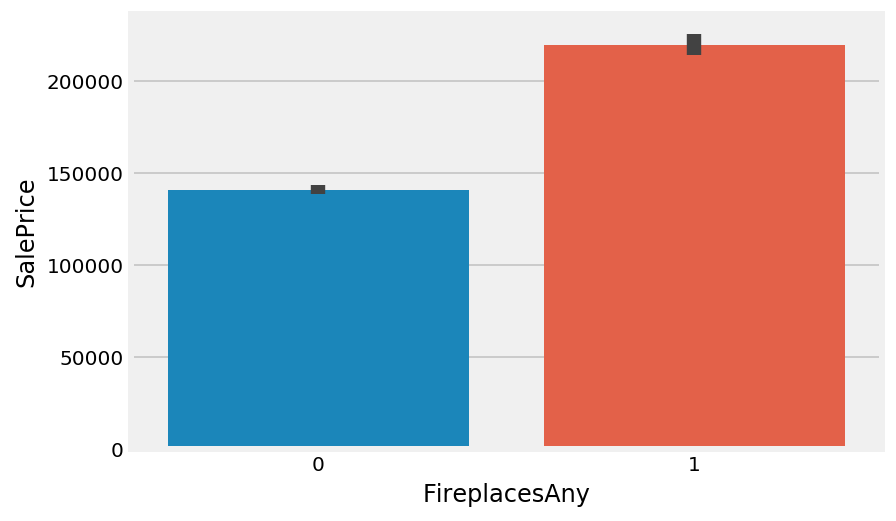

In [84]:
sns.barplot(x='FireplacesAny', y='SalePrice', data=ames)

In [85]:
ames['SaleType'].value_counts()

WD       1760
New       169
COD        68
ConLD      20
CWD        11
ConLI       6
ConLw       5
Oth         5
Con         3
Name: SaleType, dtype: int64

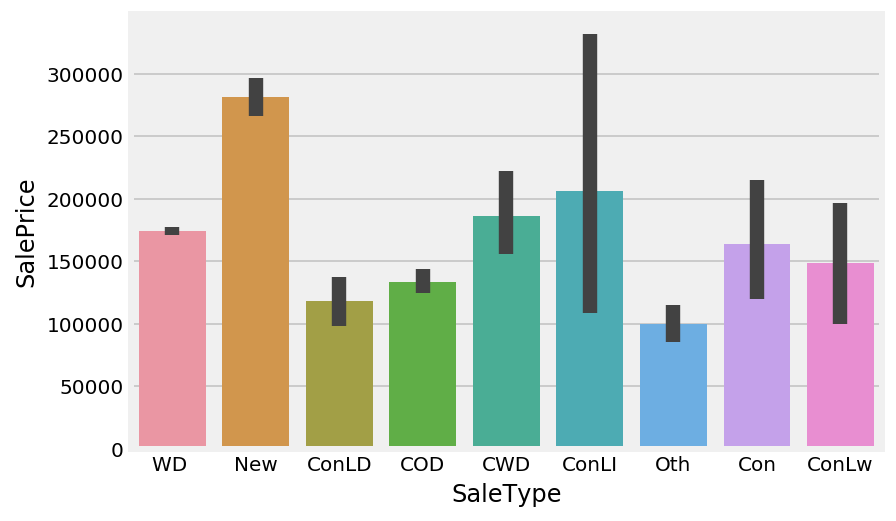

In [86]:
sns.barplot(x='SaleType', y='SalePrice', data=ames)

In [87]:
ames['SaleCondition'].value_counts()

Normal     1684
Partial     171
Abnorml     136
Family       31
Alloca       17
AdjLand       8
Name: SaleCondition, dtype: int64

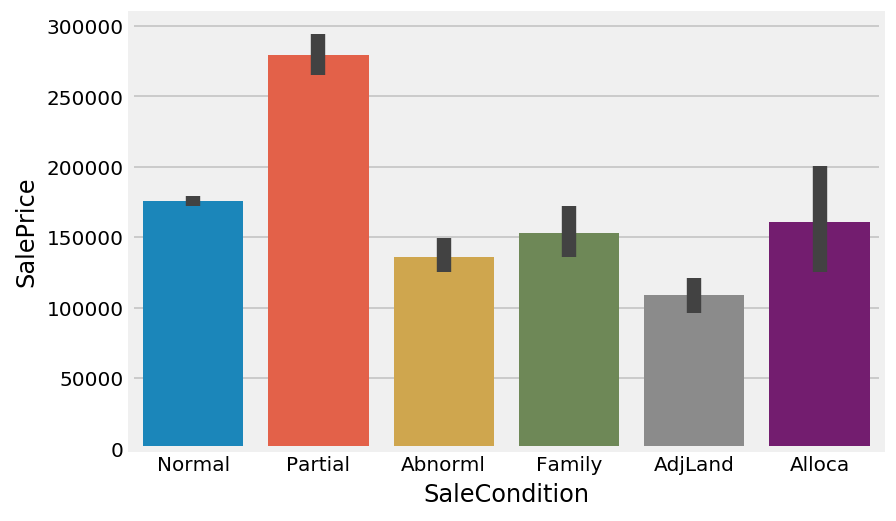

In [88]:
sns.barplot(x='SaleCondition', y='SalePrice', data=ames)

### Create target variable with SalePrice column and create training DataFrame with my desired features in it :

In [90]:
model_features = ['MSSubClass','MSZoning','LotArea','Street',\
                  'LotConfig','Neighborhood','Condition1','HouseStyle','OverallQual',\
                  'YearRemodAdd','Exterior1st','ExterQual','BsmtQual','CentralAir',\
                  'GrLivArea','TotalBath','FireplacesAny','SaleType']
y = ames['SalePrice']
X = ames[model_features]


In [91]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,LotConfig,Neighborhood,Condition1,HouseStyle,OverallQual,YearRemodAdd,Exterior1st,ExterQual,BsmtQual,CentralAir,GrLivArea,TotalBath,FireplacesAny,SaleType
0,20,RL,10872,Pave,Inside,NridgHt,Norm,1Story,9,2006,VinylSd,Gd,Ex,Y,1531,3.0,1,WD
1,20,RL,11900,Pave,Corner,NAmes,Norm,1Story,6,1957,HdBoard,TA,TA,Y,1392,2.0,1,WD
2,60,RL,11924,Pave,Inside,NridgHt,Norm,2Story,9,2006,WdShing,Ex,Ex,Y,2324,4.0,1,New
3,20,RL,13651,Pave,Inside,NAmes,Norm,1Story,7,1973,Plywood,TA,Gd,Y,2223,3.0,1,WD
4,80,RL,13607,Pave,Inside,Crawfor,Norm,SLvl,6,1986,VinylSd,TA,TA,Y,1982,3.0,1,WD


In [92]:
X.dtypes

MSSubClass         int64
MSZoning          object
LotArea            int64
Street            object
LotConfig         object
Neighborhood      object
Condition1        object
HouseStyle        object
OverallQual        int64
YearRemodAdd       int64
Exterior1st       object
ExterQual         object
BsmtQual          object
CentralAir        object
GrLivArea          int64
TotalBath        float64
FireplacesAny      int64
SaleType          object
dtype: object

In [93]:
X.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotConfig        0
Neighborhood     0
Condition1       0
HouseStyle       0
OverallQual      0
YearRemodAdd     0
Exterior1st      0
ExterQual        0
BsmtQual         0
CentralAir       0
GrLivArea        0
TotalBath        0
FireplacesAny    0
SaleType         0
dtype: int64

> ### Observation: There are no nulls. I need to create dummy variables for categorical features.

### Change categorical features to dummy variables:

In [97]:
dummy_prefix = ['mssubclass','mszoning','street','lotconfig','neighborhood',\
              'condition1','housestyle','exterior1st','exterqual','bsmtqual'\
              ,'centralair','saletype']

dummy_cols = ['MSSubClass','MSZoning','Street','LotConfig','Neighborhood',\
              'Condition1','HouseStyle','Exterior1st','ExterQual','BsmtQual'\
              ,'CentralAir','SaleType']

In [98]:
X = pd.get_dummies(X, prefix=dummy_prefix, columns=dummy_cols)
X.head()

,LotArea,OverallQual,YearRemodAdd,GrLivArea,TotalBath,FireplacesAny,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,...,centralair_Y,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,10872,9,2006,1531,3.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,11900,6,1957,1392,2.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,11924,9,2006,2324,4.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,13651,7,1973,2223,3.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,13607,6,1986,1982,3.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


### Build LinearRegression model:

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
mlr = LinearRegression()

In [100]:
kfold = KFold(n_splits=5, random_state=42)

In [101]:
cvs = cross_val_score(mlr, X, y, cv=kfold)

In [102]:
print 'Cross-val scores:', cvs
print 'Mean of cross-val scores:', cvs.mean()

Cross-val scores: [ 0.86921715  0.8732862   0.86254268  0.89152921  0.90616795]
Mean of cross-val scores: 0.88054863805


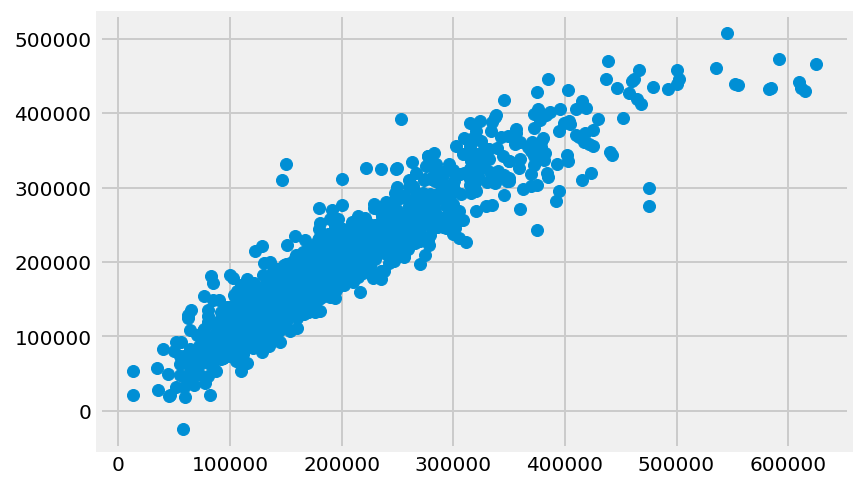

In [103]:
predictions = cross_val_predict(mlr, X, y, cv=5)
plt.scatter(y, predictions)

> ### Observation: Scatter plot of Predictions to actual looks good. Proceed with test data.

### Load in the test dataset and do similar EDA as train data to prepare it for model :

In [105]:
ames_test = pd.read_csv('test.csv')

In [106]:
ames_test.shape

(879, 79)

In [107]:
ames_test.isnull().sum()

PID                0
MSSubClass         0
MSZoning           0
LotFrontage      144
LotArea            0
Street             0
Alley            814
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         4
MasVnrArea         4
ExterQual          0
ExterCond          0
Foundation         0
                ... 
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd       0
Functional         0
Fireplaces         0
FireplaceQu      421
GarageType        40
GarageYrBlt       40
GarageFinish      40
GarageCars         0
GarageArea         0
GarageQual        40
GarageCond        40
PavedDrive   

In [108]:
ames_test['TotalBath'] = ames_test['FullBath'] + ames_test['BsmtFullBath']

In [109]:
ames_test['FireplacesAny'] = [0 if x==0 else 1 for x in ames_test['Fireplaces']]

In [110]:
X_test = ames_test[model_features]

In [111]:
X_test.shape

(879, 18)

In [112]:
X_test.isnull().sum()

MSSubClass        0
MSZoning          0
LotArea           0
Street            0
LotConfig         0
Neighborhood      0
Condition1        0
HouseStyle        0
OverallQual       0
YearRemodAdd      0
Exterior1st       0
ExterQual         0
BsmtQual         21
CentralAir        0
GrLivArea         0
TotalBath         0
FireplacesAny     0
SaleType          0
dtype: int64

In [113]:
X_test['BsmtQual'].value_counts(dropna=False)

TA     399
Gd     356
Ex      79
Fa      24
NaN     21
Name: BsmtQual, dtype: int64

In [114]:
X_test['BsmtQual'].replace(np.nan, 'None', inplace=True)

/Users/richardgiegerich/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3924: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [115]:
X_test['BsmtQual'].value_counts(dropna=False)

TA      399
Gd      356
Ex       79
Fa       24
None     21
Name: BsmtQual, dtype: int64

In [116]:
X_test.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotConfig        0
Neighborhood     0
Condition1       0
HouseStyle       0
OverallQual      0
YearRemodAdd     0
Exterior1st      0
ExterQual        0
BsmtQual         0
CentralAir       0
GrLivArea        0
TotalBath        0
FireplacesAny    0
SaleType         0
dtype: int64

### Create dummy variables of same categorical features as done on train data:

In [118]:
X_test = pd.get_dummies(X_test, prefix=dummy_prefix, columns=dummy_cols)
X_test.head()

,LotArea,OverallQual,YearRemodAdd,GrLivArea,TotalBath,FireplacesAny,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,...,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_VWD,saletype_WD
0,9978,6,1998,1604,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4920,8,2001,1338,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10000,6,1994,1655,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53504,8,2003,3279,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11394,9,2010,1856,2.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
print 'X shape is: ', X.shape
print 'X_test shape is: ', X_test.shape

X shape is:  (2047, 114)
X_test shape is:  (879, 113)


In [120]:
X.columns

Index([u'LotArea', u'OverallQual', u'YearRemodAdd', u'GrLivArea', u'TotalBath',
       u'FireplacesAny', u'mssubclass_20', u'mssubclass_30', u'mssubclass_40',
       u'mssubclass_45',
       ...
       u'centralair_Y', u'saletype_COD', u'saletype_CWD', u'saletype_Con',
       u'saletype_ConLD', u'saletype_ConLI', u'saletype_ConLw',
       u'saletype_New', u'saletype_Oth', u'saletype_WD '],
      dtype='object', length=114)

In [121]:
X_test.columns

Index([u'LotArea', u'OverallQual', u'YearRemodAdd', u'GrLivArea', u'TotalBath',
       u'FireplacesAny', u'mssubclass_20', u'mssubclass_30', u'mssubclass_40',
       u'mssubclass_45',
       ...
       u'saletype_COD', u'saletype_CWD', u'saletype_Con', u'saletype_ConLD',
       u'saletype_ConLI', u'saletype_ConLw', u'saletype_New', u'saletype_Oth',
       u'saletype_VWD', u'saletype_WD '],
      dtype='object', length=113)

In [122]:
X.head()

,LotArea,OverallQual,YearRemodAdd,GrLivArea,TotalBath,FireplacesAny,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,...,centralair_Y,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,10872,9,2006,1531,3.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,11900,6,1957,1392,2.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,11924,9,2006,2324,4.0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,13651,7,1973,2223,3.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,13607,6,1986,1982,3.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [123]:
X_test.head()

,LotArea,OverallQual,YearRemodAdd,GrLivArea,TotalBath,FireplacesAny,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,...,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_VWD,saletype_WD
0,9978,6,1998,1604,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4920,8,2001,1338,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,10000,6,1994,1655,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,53504,8,2003,3279,4.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11394,9,2010,1856,2.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


> ### Observation: I have columns that don't match X and X_test.  I will need to figure out these columns that exist in one but not the other.

In [125]:
x_cols = X.columns.tolist()
x_test_cols = X_test.columns.tolist()

In [126]:
x_not_xtest = []
xtest_not_x = []

for col in x_cols:
    if col not in x_test_cols:
        x_not_xtest.append(col)

for coll in x_test_cols:
    if coll not in x_cols:
        xtest_not_x.append(coll)
        
print 'Columns in X but not X_test :'
print x_not_xtest
print
print 'Columns in X_test but not X :'
print xtest_not_x

Columns in X but not X_test :
['mssubclass_150', 'mszoning_A (agr)', 'mszoning_I (all)', 'exterior1st_CBlock', 'exterior1st_Stone', 'bsmtqual_Po']

Columns in X_test but not X :
['neighborhood_GrnHill', 'neighborhood_Landmrk', 'exterior1st_ImStucc', 'exterior1st_PreCast', 'saletype_VWD']


### The columns in X_test that are not in X need to be dropped from X_test. The columns in X that are not in X_test need to be added to X_test :

In [128]:
X_test.drop(xtest_not_x, axis=1, inplace=True)

In [129]:
for col in x_not_xtest:
    col_index = X.columns.get_loc(col)
    X_test.insert(col_index, col, 0)

In [130]:
print X.shape
print X_test.shape

(2047, 114)
(879, 114)


In [131]:
x_cols = X.columns.tolist()
x_test_cols = X_test.columns.tolist()

x_not_xtest = []
xtest_not_x = []

for col in x_cols:
    if col not in x_test_cols:
        x_not_xtest.append(col)
        
for coll in x_test_cols:
    if coll not in x_cols:
        xtest_not_x.append(coll)

print 'Columns in X but not X_test :'
print x_not_xtest
print
print 'Columns in X_test but not X :'
print xtest_not_x

Columns in X but not X_test :
[]

Columns in X_test but not X :
[]


> ### Observation: Columns match!!!

In [132]:
print 'X-150: ', X.columns.get_loc('mssubclass_150')
print 'X_test-150: ', X_test.columns.get_loc('mssubclass_150')

X-150:  18
X_test-150:  18


In [133]:
match = 0
mismatch = 0
for column in X.columns.tolist():
    if X.columns.get_loc(column) == X_test.columns.get_loc(column):
        match = match + 1
    else:
        mismatch = mismatch + 1
print 'Matches are: ',match
print 'Mismatches are: ', mismatch

Matches are:  114
Mismatches are:  0


In [134]:
print X.columns[49]
print X_test.columns[49]

neighborhood_NAmes
neighborhood_NAmes


In [135]:
print X.columns[108]
print X_test.columns[108]

saletype_ConLD
saletype_ConLD


In [136]:
X.head(1)

,LotArea,OverallQual,YearRemodAdd,GrLivArea,TotalBath,FireplacesAny,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,...,centralair_Y,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,10872,9,2006,1531,3.0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [137]:
X_test.head(1)

,LotArea,OverallQual,YearRemodAdd,GrLivArea,TotalBath,FireplacesAny,mssubclass_20,mssubclass_30,mssubclass_40,mssubclass_45,...,centralair_Y,saletype_COD,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD
0,9978,6,1998,1604,2.0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [138]:
# One last check that all columns match >>>>>>

In [139]:
for index in range(len(X.columns)):
    print(X.columns[index], X_test.columns[index])
    if X.columns[index] == X_test.columns[index]:
        print 'SAME'
    else:
        print 'DIFFERENT'

('LotArea', 'LotArea')
SAME
('OverallQual', 'OverallQual')
SAME
('YearRemodAdd', 'YearRemodAdd')
SAME
('GrLivArea', 'GrLivArea')
SAME
('TotalBath', 'TotalBath')
SAME
('FireplacesAny', 'FireplacesAny')
SAME
('mssubclass_20', 'mssubclass_20')
SAME
('mssubclass_30', 'mssubclass_30')
SAME
('mssubclass_40', 'mssubclass_40')
SAME
('mssubclass_45', 'mssubclass_45')
SAME
('mssubclass_50', 'mssubclass_50')
SAME
('mssubclass_60', 'mssubclass_60')
SAME
('mssubclass_70', 'mssubclass_70')
SAME
('mssubclass_75', 'mssubclass_75')
SAME
('mssubclass_80', 'mssubclass_80')
SAME
('mssubclass_85', 'mssubclass_85')
SAME
('mssubclass_90', 'mssubclass_90')
SAME
('mssubclass_120', 'mssubclass_120')
SAME
('mssubclass_150', 'mssubclass_150')
SAME
('mssubclass_160', 'mssubclass_160')
SAME
('mssubclass_180', 'mssubclass_180')
SAME
('mssubclass_190', 'mssubclass_190')
SAME
('mszoning_A (agr)', 'mszoning_A (agr)')
SAME
('mszoning_C (all)', 'mszoning_C (all)')
SAME
('mszoning_FV', 'mszoning_FV')
SAME
('mszoning_I (al

> ### Observation: As shown above, just to be sure, a few last checks confirmed that columns are the same in train and test data.

### Time to get a CSV file to submit :

In [141]:
mlr.fit(X, y)
sub_preds = mlr.predict(X_test)

In [142]:
len(sub_preds)

879

In [143]:
ames_test.head(2)

,PID,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,TotalBath,FireplacesAny
0,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,2.0,1
1,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,3.0,0


### Check that sizes match between PID and prediction columns:

In [185]:
print 'Length of test PID column: ', len(ames_test['PID'])
print 'Length of predictions column: ', len(sub_preds)

Length of test PID column:  879
Length of predictions column:  879


In [145]:
sub_df = pd.DataFrame()
sub_df['PID'] = ames_test['PID']
sub_df['SalePrice'] = sub_preds

In [146]:
sub_df.head(2)

,PID,SalePrice
0,527105030,168078.784709
1,527127150,237566.629198


In [147]:
sub_df.to_csv('rich_sub1', index=False)

> ## Final Regression Observation:  Multi-Linear Regression performed well. Top score on Kaggle.

 # <font color=red>PART 2 : CLASSIFICATION CHALLENGE</font>

> ## First review my features from Regression Challenge and add the SaleCondition feature. Create dummy variables from SaleCondition since it is categorical and has the Abnormal value we need....

In [148]:
X.columns

Index([u'LotArea', u'OverallQual', u'YearRemodAdd', u'GrLivArea', u'TotalBath',
       u'FireplacesAny', u'mssubclass_20', u'mssubclass_30', u'mssubclass_40',
       u'mssubclass_45',
       ...
       u'centralair_Y', u'saletype_COD', u'saletype_CWD', u'saletype_Con',
       u'saletype_ConLD', u'saletype_ConLI', u'saletype_ConLw',
       u'saletype_New', u'saletype_Oth', u'saletype_WD '],
      dtype='object', length=114)

In [149]:
X['SaleCondition'] = ames['SaleCondition']

In [150]:
X.columns

Index([u'LotArea', u'OverallQual', u'YearRemodAdd', u'GrLivArea', u'TotalBath',
       u'FireplacesAny', u'mssubclass_20', u'mssubclass_30', u'mssubclass_40',
       u'mssubclass_45',
       ...
       u'saletype_COD', u'saletype_CWD', u'saletype_Con', u'saletype_ConLD',
       u'saletype_ConLI', u'saletype_ConLw', u'saletype_New', u'saletype_Oth',
       u'saletype_WD ', u'SaleCondition'],
      dtype='object', length=115)

In [151]:
X = pd.get_dummies(X, prefix='salecondition', columns=['SaleCondition'])

In [152]:
X.columns

Index([u'LotArea', u'OverallQual', u'YearRemodAdd', u'GrLivArea', u'TotalBath',
       u'FireplacesAny', u'mssubclass_20', u'mssubclass_30', u'mssubclass_40',
       u'mssubclass_45',
       ...
       u'saletype_ConLw', u'saletype_New', u'saletype_Oth', u'saletype_WD ',
       u'salecondition_Abnorml', u'salecondition_AdjLand',
       u'salecondition_Alloca', u'salecondition_Family',
       u'salecondition_Normal', u'salecondition_Partial'],
      dtype='object', length=120)

> ## Now that dummy variables are made, assign the Abnormal feature as the target variable y.  I can now delete the other SaleCondition features since they will not be in our test data....

In [153]:
y_class = X['salecondition_Abnorml']
X_class = X.drop(['salecondition_Abnorml', 'salecondition_AdjLand',\
                  'salecondition_Alloca', 'salecondition_Family', \
                  'salecondition_Normal', 'salecondition_Partial'], axis=1)

#### Confirm that all other SaleCondition features have been removed:

In [154]:
X_class.columns

Index([u'LotArea', u'OverallQual', u'YearRemodAdd', u'GrLivArea', u'TotalBath',
       u'FireplacesAny', u'mssubclass_20', u'mssubclass_30', u'mssubclass_40',
       u'mssubclass_45',
       ...
       u'centralair_Y', u'saletype_COD', u'saletype_CWD', u'saletype_Con',
       u'saletype_ConLD', u'saletype_ConLI', u'saletype_ConLw',
       u'saletype_New', u'saletype_Oth', u'saletype_WD '],
      dtype='object', length=114)

> ## Calculate baseline accuracy before running models....

In [155]:
y_class.value_counts()

0    1911
1     136
Name: salecondition_Abnorml, dtype: int64

In [156]:
baseline = 1-np.mean(y_class)
baseline

0.93356130923302394

> # I will try K-Nearest Neighbors models with StratifiedKFold first....

In [157]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5, random_state=42)

### Try standard KNN-5

In [158]:
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [159]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xs_class = ss.fit_transform(X_class)

In [160]:
scores5 = cross_val_score(knn5, Xs_class, y_class, cv=skf)
print 'KNN5 five-fold scores:'
print scores5
print 'Mean: ',scores5.mean(), 'Std: ', scores5.std()

KNN5 five-fold scores:
[ 0.93430657  0.93643032  0.93398533  0.92420538  0.93154034]
Mean:  0.932093587707 Std:  0.00423823365881


In [161]:
knn5.fit(Xs_class, y_class)
knn5.score(Xs_class, y_class)

0.93942354665363947

In [162]:
Xs_class.shape

(2047, 114)

In [163]:
X_test.shape

(879, 114)

In [164]:
class_preds = knn5.predict(X_test)

In [165]:
sub_class_df = pd.DataFrame()
sub_class_df['PID'] = ames_test['PID']
sub_class_df['SaleCondition'] = class_preds

### Convert to CSV for Kaggle submission...

In [166]:
sub_class_df.to_csv('rich_class_sub1', index=False)

#### Kaggle accuracy was .93970, which is Ok, but I will try to improve on that....

In [167]:
# Let's try KNN of 1

In [168]:
knn50 = KNeighborsClassifier(n_neighbors=50, weights='uniform')
scores50 = cross_val_score(knn50, Xs_class, y_class, cv=skf)
print 'KNN50 five-fold scores:'
print scores50
print 'Mean: ',scores50.mean(), 'Std: ', scores50.std()

KNN50 five-fold scores:
[ 0.93187348  0.93398533  0.93398533  0.93398533  0.93398533]
Mean:  0.933562959922 Std:  0.000844740301846


In [169]:
knn50.fit(Xs_class, y_class)
knn50.score(Xs_class, y_class)

0.93356130923302394

In [170]:
knn50.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [171]:
knn50dist = KNeighborsClassifier(n_neighbors=50, weights='distance')
scores50dist = cross_val_score(knn50dist, Xs_class, y_class, cv=skf)
print 'KNN50dist five-fold scores:'
print scores50dist
print 'Mean: ',scores50dist.mean(), 'Std: ', scores50dist.std()

KNN50dist five-fold scores:
[ 0.93187348  0.93154034  0.93398533  0.93398533  0.93154034]
Mean:  0.932584964812 Std:  0.00114984605316


In [172]:
knn50dist.fit(Xs_class, y_class)
knn50dist.score(Xs_class, y_class)

1.0

In [173]:
knn50dist.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

> ### Observation:  I submitted KNN5 and then to try to improve upon that accuracy I then tried KNN1 and KNN50 and KNN50 set to distance, but I was getting the same predictions. I will try Logistic Regression now.

In [174]:
from sklearn.linear_model import LogisticRegression

In [175]:
logreg = LogisticRegression(C=.25, random_state=42, penalty='l1')
logreg.fit(Xs_class, y_class)

LogisticRegression(C=0.25, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
logreg.score(Xs_class, y_class)

0.94137762579384465

In [177]:
logreg.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

> ## Final Classification Observation:  I have tried KNN and LogisticRegression (both with different hyperparameters) yet I am still getting the same predictions with all 0.  All of my classification models are predicting that none of the sales are Abnormal.